In [16]:
import numpy as np

In [69]:
def read_input(filename):
    all_lines = open(filename).readlines()
    R, C, L, H = [int (value) for value in all_lines[0].split()]
    pizza = np.array([list(map(lambda item: 1 if item == 'T' else 0, row.strip())) for row in all_lines[1:]])
    return R, C, L, H, pizza

In [18]:
R, C, L, H, pizza = read_input("medium.in")

In [19]:
import matplotlib.pyplot as plt
import numpy as np

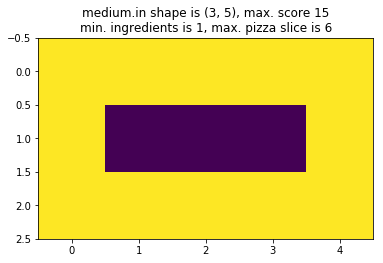

In [67]:
fig, ax = plt.subplots()
ax.imshow(pizza)
ax.set_title(f'medium.in shape is {pizza.shape}, max. score {pizza.size}\nmin. ingredients is {L}, max. pizza slice is {H}');

In [654]:
import tqdm
from random import randint

def satisfy_constraints(location, shape, slice_mask, pizza, L, H):
    r, c = location
    sh_r, sh_c = shape
    if slice_mask[r:r+sh_r, c:c+sh_c].size == sh_r * sh_c:
        if np.all(slice_mask[r:r+sh_r, c:c+sh_c]) == 0:
            if sh_r * sh_c <= H:
                tomatoes = np.sum(pizza[r:r+sh_r, c:c+sh_c])
                mushrooms = sh_r * sh_c - tomatoes
                if tomatoes >= L and mushrooms >= L:
                    return True
    return False

def cut_slices(location, shape, current_slices, slice_mask):
    r, c = location
    sh_r, sh_c = shape
    slice_mask[r:r+sh_r, c:c+sh_c] = 1
    current_slices.append((r, c, sh_r, sh_c))

def get_random_available_location(slice_mask):
    nonzero_elements = np.nonzero(1 - slice_mask)
    n = len(nonzero_elements[0])
    index = randint(0, n - 1)
    return nonzero_elements[0][index], nonzero_elements[1][index]
    
def pz(file_name):
    R, C, L, H, pizza = read_input(file_name)
    arrange_slices = [(a, b) for a in range(1, H) for b in range(1, H) if a * b <= H and a * b >= L]
    slice_mask = np.zeros_like(pizza)
    pizza_slices = []
    for _ in tqdm.tqdm(range(200000)):
        location = get_random_available_location(slice_mask)
        shape = arrange_slices[randint(0, len(arrange_slices) - 1)]
        if satisfy_constraints(location, shape, slice_mask, pizza, L, H):
            cut_slices(location, shape, pizza_slices, slice_mask)
    print(pizza_slices)
        
        

In [669]:
pz("medium.in")

  0%|          | 0/200000 [00:00<?, ?it/s]


ValueError: empty range for randrange() (0,0, 0)